In [415]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import norm
from scipy.stats import ttest_ind
from scipy.stats import poisson
from scipy.stats import expon
from scipy.stats import binom
from scipy.stats import lognorm
from scipy.stats import geom

# About Walmart

#### Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.



In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1lcjtmvtSjco6cnWaJvgJNTGjGJoKieh1')

In [5]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


In [10]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,23961.000000


In [12]:
df.describe(include="object")

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
count,550068,550068,550068,550068,550068
unique,3631,2,7,3,5
top,P00265242,M,26-35,B,1
freq,1880,414259,219587,231173,193821


In [13]:
df.shape

(550068, 10)

In [17]:
df["Gender"].value_counts()

M    414259
F    135809
Name: Gender, dtype: int64

# Checking for outliers

<Axes: xlabel='Gender', ylabel='Purchase'>

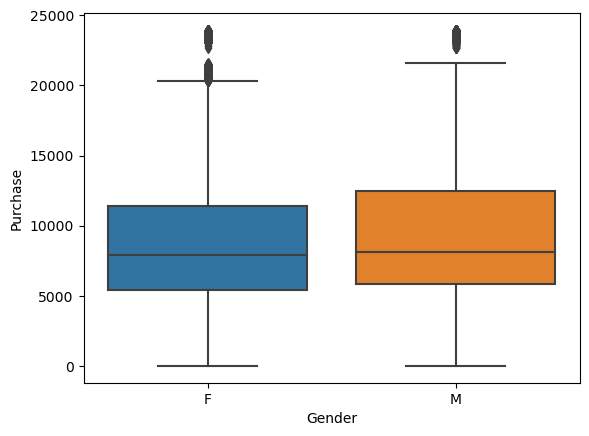

In [30]:
sns.boxplot(data = df , x = "Gender",y="Purchase")

## Removing outliers using IQR(Inter Quartile Range)

In [34]:
q1 = np.percentile(df["Purchase"], 25)
q3 = np.percentile(df["Purchase"], 75)
q1,q3

(5823.0, 12054.0)

In [39]:
IQR = q3 - q1

from scipy.stats import iqr
iqr = iqr(df["Purchase"])
IQR,iqr

(6231.0, 6231.0)

In [49]:
df1 = df[(df["Purchase"]>(q1-1.5*iqr)) & (df["Purchase"]<(q3+1.5*iqr)) ]
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


<Axes: xlabel='Gender', ylabel='Purchase'>

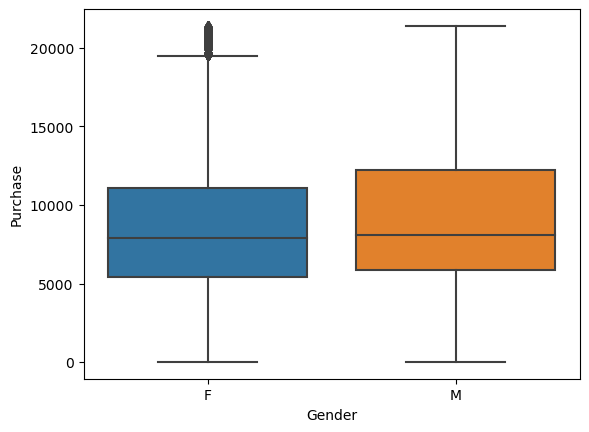

In [50]:
sns.boxplot(data = df1,x="Gender",y="Purchase")

## Outliers Removed

In [59]:
len(df) - len(df1)  #removed 2677 outliers

2677

## Tracking the amount spent per transaction of all the 50 million female customers, and all the 50 million male customers, calculate the average, and conclude the results.

In [72]:
df1.groupby("Gender")["Purchase"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,135220.0,8671.049039,4679.058483,12.0,5429.0,7906.0,11064.0,21398.0
M,412171.0,9367.724355,5009.234088,12.0,5852.0,8089.0,12247.0,21399.0


## Average amount spent by Male -->93676.7
## Average amount spent by Female -->8671.0

# Calculating the interval of male and female purchase with 95% confidence level

<Axes: xlabel='Purchase', ylabel='Density'>

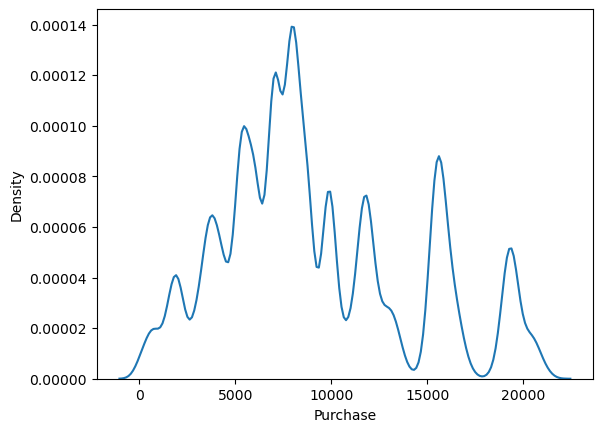

In [76]:
sns.kdeplot(df1["Purchase"]) #not normal distribution

In [113]:
male_df = df1[df1["Gender"]=="M"]
male_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,15686


In [112]:
female_df = df1[df1["Gender"]=="F"]
female_df.head(5)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
14,1000006,P00231342,F,51-55,9,A,1,0,5,5378


In [372]:
male_df["Purchase"].sum() - female_df["Purchase"].sum()

2688605064

## This shows that in total Male purchase more than Female customers. (But this could be because no. of males are more than no.of females.)

# BOOTSTRAPPING

In [175]:
sample_size = 10000
iteration = 500
sample_male = []
for i in range(iteration):
    sample_male.append(male_df.sample(sample_size)["Purchase"].mean())
sample_male

[9358.0823,
 9280.5267,
 9353.5883,
 9314.9338,
 9424.1932,
 9377.6291,
 9346.4448,
 9362.7666,
 9354.9324,
 9381.1603,
 9311.9249,
 9391.4522,
 9308.6721,
 9346.7738,
 9402.3178,
 9401.9955,
 9376.4866,
 9342.289,
 9438.0465,
 9331.6691,
 9382.9897,
 9359.0611,
 9285.2321,
 9310.9028,
 9313.2294,
 9329.2736,
 9374.7012,
 9315.4437,
 9417.2896,
 9401.8091,
 9373.6593,
 9392.4474,
 9334.0009,
 9342.6806,
 9250.8223,
 9286.1666,
 9409.0241,
 9357.2277,
 9366.152,
 9331.0023,
 9379.5239,
 9356.1564,
 9394.2236,
 9436.5926,
 9339.524,
 9400.2626,
 9400.7489,
 9300.8984,
 9407.6758,
 9382.8159,
 9393.7883,
 9413.579,
 9369.2188,
 9313.7463,
 9408.8799,
 9289.4463,
 9439.1278,
 9283.5534,
 9379.5559,
 9325.0368,
 9484.3579,
 9348.0696,
 9365.6316,
 9337.8557,
 9398.338,
 9354.3701,
 9441.5235,
 9368.8978,
 9410.9456,
 9389.566,
 9471.7534,
 9366.5662,
 9346.9169,
 9470.8756,
 9407.7754,
 9368.4552,
 9349.4606,
 9307.1804,
 9324.9548,
 9364.511,
 9252.2832,
 9339.4118,
 9389.6678,
 9426.2473,

In [192]:
sample_size = 10000
iteration = 500
sample_female = []
for i in range(iteration):
    sample_female.append(female_df.sample(sample_size)["Purchase"].mean())
sample_female

[8618.8625,
 8710.39,
 8636.3089,
 8618.4535,
 8712.5818,
 8714.8762,
 8674.3127,
 8697.4713,
 8776.6212,
 8688.8318,
 8628.2991,
 8705.8674,
 8702.6593,
 8594.1147,
 8715.2848,
 8679.956,
 8631.38,
 8746.6689,
 8634.9077,
 8595.1947,
 8581.8532,
 8708.012,
 8650.2614,
 8552.7384,
 8743.1512,
 8673.0385,
 8672.4542,
 8708.0595,
 8768.8248,
 8607.8032,
 8647.4212,
 8641.4012,
 8656.0979,
 8672.5846,
 8618.6876,
 8592.6185,
 8682.2758,
 8616.5226,
 8648.8528,
 8637.606,
 8692.8876,
 8661.974,
 8638.6713,
 8652.0915,
 8723.5346,
 8715.0452,
 8754.7647,
 8715.9849,
 8645.0719,
 8642.8956,
 8614.4507,
 8686.0563,
 8694.5832,
 8689.1389,
 8617.12,
 8731.1983,
 8670.5899,
 8657.6047,
 8687.3672,
 8669.5241,
 8746.8382,
 8835.2736,
 8681.7292,
 8719.0031,
 8605.2687,
 8667.1461,
 8617.6619,
 8676.2232,
 8671.9556,
 8720.7893,
 8679.7683,
 8692.7533,
 8736.1301,
 8664.5607,
 8705.0523,
 8613.3289,
 8680.3955,
 8677.5713,
 8699.9665,
 8642.6474,
 8674.8274,
 8698.8116,
 8613.2974,
 8673.0062,
 8

In [193]:
sample_male_mean = np.mean(sample_male)
sample_male_std = np.std(sample_male)
sample_male_mean,sample_male_std

(9367.828896500001, 50.33609810561415)

In [194]:
sample_female_mean = np.mean(sample_female)
sample_female_std = np.std(sample_female)
sample_female_mean,sample_female_std 

(8672.5400878, 44.15756608131287)

In [195]:
df_male = pd.DataFrame(sample_male,columns = ["sample_male"])
df_male.head(5)

,sample_male
0,9358.0823
1,9280.5267
2,9353.5883
3,9314.9338
4,9424.1932


In [196]:
df_female = pd.DataFrame(sample_female,columns = ["sample_female"])
df_female.head(5)

,sample_female
0,8618.8625
1,8710.3900
2,8636.3089
3,8618.4535
4,8712.5818


<Axes: ylabel='Density'>

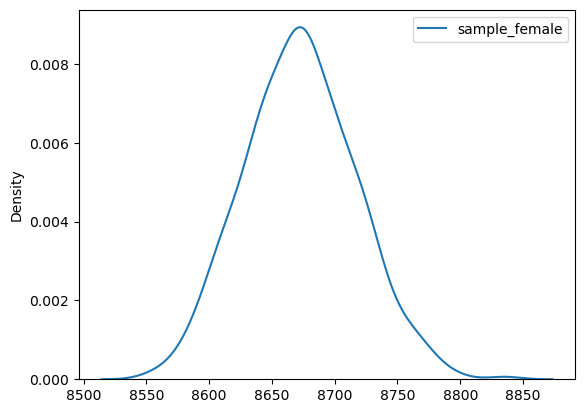

In [197]:
sns.kdeplot(df_female) # normal distribution

<Axes: ylabel='Density'>

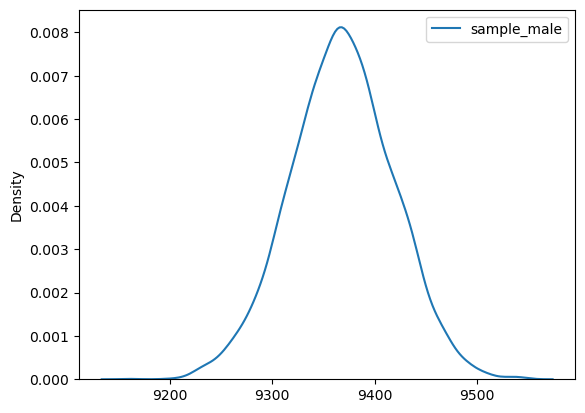

In [198]:
sns.kdeplot(df_male) #normal distribution

In [208]:
norm.ppf(0.025) #95% confidence level --> 0.05/2 --> 0.025

-1.9599639845400545

In [209]:
norm.ppf(0.975) #upper level --> 1-0.025 =0.975 

1.959963984540054

In [210]:
lower_limit_of_male = sample_male_std*-1.96 + sample_male_mean
lower_limit_of_male

9269.170144212998

In [211]:
upper_limit_of_male = sample_male_std*1.96 + sample_male_mean
upper_limit_of_male

9466.487648787004

In [212]:
lower_limit_of_female = sample_female_std*-1.96 + sample_female_mean
lower_limit_of_female

8585.991258280626

In [213]:
lower_limit_of_female = sample_female_std*1.96 + sample_female_mean
lower_limit_of_female

8759.088917319374

# Alternative way

In [226]:
female_confidence_interval_95 = np.percentile(df_female["sample_female"],[2.5,97.5])
female_confidence_interval_95

array([8591.2217375, 8763.6390425])

## we can conclude with 95% confidence that females spend between 8591.22 and 8763.63

In [227]:
male_confidence_interval_95 = np.percentile(df_male["sample_male"],[2.5,97.5])
male_confidence_interval_95

array([9267.2366325, 9466.0479625])

## we can conclude with 95% confidence that males spend between 9267.23 and 9466.04

# Calculating the interval of male and female purchase with 90% confidence level

In [242]:
female_confidence_interval_90 = np.percentile(df_female["sample_female"],[5,95])
female_confidence_interval_90

array([8600.532255, 8746.677365])

## we can conclude with 90% confidence that females spend between 8600.53 and 8746.67

In [235]:
male_confidence_interval_90 = np.percentile(df_male["sample_male"],[5,95])
male_confidence_interval_90

array([9283.77095 , 9449.730155])

## we can conclude with 90% confidence that males spend between 9283.77 and 9449.73

In [234]:
# sns.kdeplot(df1[df1["Gender"]=="M"]["Purchase"])

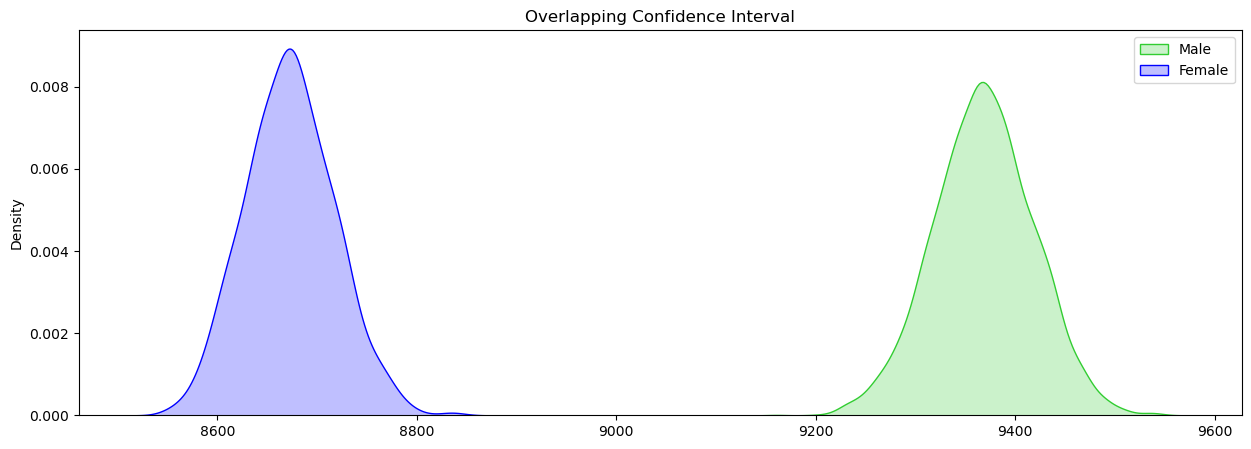

In [370]:
plt.figure(figsize=(15,5))
sns.kdeplot(sample_male,fill=True,color='limegreen',label="Male")
sns.kdeplot(sample_female,fill=True,color = "blue",label="Female")
plt.title("Overlapping Confidence Interval")
plt.legend()
plt.show()

## CONCLUSION
### males spend between 9267.23 and 9466.04
### females spend between 8591.22 and 8763.63
### Clearly with 95% confidence level, we can say that on an average Males spend more than Females on Black Friday

# CLT FOR MARITAL STATUS

In [280]:
df1

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [284]:
df["Marital_Status"].nunique()

2

In [294]:
unmarried_data = df1[df1["Marital_Status"] == 0]

In [295]:
married_data = df1[df1["Marital_Status"] == 1]

In [298]:
married_data["Purchase"].sum() - unmarried_data["Purchase"].sum() 

-915071874

 #### Unmarried customers buy more as compared to Married customers

In [352]:
married_sample=[]
for i in range(300):
    married_sample.append(married_data["Purchase"].sample(sample_size).mean()) ##sample_size = 10000 , iteration=300

In [353]:
married_sample

[9213.6037,
 9209.5965,
 9324.4207,
 9213.3995,
 9151.0897,
 9173.4131,
 9236.3164,
 9117.6194,
 9192.7083,
 9218.773,
 9192.3512,
 9219.8576,
 9187.6341,
 9213.1621,
 9237.871,
 9175.4413,
 9298.1901,
 9240.2553,
 9216.6518,
 9171.8428,
 9246.1893,
 9254.847,
 9201.0355,
 9129.5152,
 9156.1958,
 9240.6236,
 9173.7465,
 9259.6332,
 9143.3981,
 9129.176,
 9082.8134,
 9281.1329,
 9220.4657,
 9122.1274,
 9174.4089,
 9165.5552,
 9155.2952,
 9221.457,
 9263.0361,
 9203.2668,
 9204.4437,
 9175.8345,
 9167.6521,
 9218.2615,
 9128.3243,
 9213.5041,
 9193.8743,
 9179.5259,
 9192.9985,
 9165.2138,
 9205.1107,
 9190.3209,
 9200.6014,
 9248.2292,
 9176.7909,
 9209.8287,
 9175.3048,
 9212.4924,
 9228.1826,
 9179.4428,
 9262.0843,
 9218.7114,
 9146.5316,
 9195.0948,
 9251.2661,
 9132.4257,
 9242.1808,
 9187.5716,
 9235.4112,
 9143.2766,
 9110.0851,
 9247.0053,
 9110.4531,
 9217.3254,
 9146.5383,
 9232.891,
 9137.9187,
 9195.9853,
 9147.9239,
 9185.3613,
 9191.2329,
 9154.8031,
 9159.0299,
 9145.5168

In [344]:
unmarried_sample=[]
for i in range(300):
    unmarried_sample.append(unmarried_data["Purchase"].sample(sample_size).mean()) ##sample_size = 10000 , iteration=300

In [346]:
unmarried_sample

[9199.0824,
 9060.2118,
 9083.9991,
 9197.4874,
 9212.2497,
 9188.1909,
 9271.0377,
 9227.6956,
 9318.4149,
 9184.9223,
 9292.6982,
 9231.3727,
 9186.8836,
 9166.8921,
 9185.5134,
 9168.6115,
 9178.154,
 9229.7791,
 9266.7365,
 9186.5005,
 9220.261,
 9143.7145,
 9100.1828,
 9305.481,
 9248.1885,
 9154.4227,
 9246.3042,
 9234.3569,
 9149.1072,
 9228.4614,
 9239.9073,
 9167.9342,
 9224.9387,
 9155.5793,
 9184.883,
 9251.8739,
 9207.5413,
 9160.608,
 9230.7566,
 9123.5848,
 9172.8594,
 9164.3365,
 9245.0054,
 9197.0296,
 9068.4749,
 9237.8044,
 9152.3142,
 9133.1936,
 9258.4348,
 9295.2689,
 9209.3499,
 9156.1055,
 9181.7742,
 9223.8661,
 9200.8964,
 9235.7446,
 9168.2223,
 9182.3795,
 9204.0739,
 9217.8739,
 9149.8945,
 9121.6747,
 9186.866,
 9138.0181,
 9216.4482,
 9154.908,
 9235.3827,
 9242.8378,
 9217.4113,
 9143.5408,
 9227.2455,
 9215.8533,
 9219.2915,
 9168.1035,
 9202.8979,
 9114.6196,
 9226.1531,
 9180.6913,
 9262.6993,
 9225.7147,
 9317.824,
 9107.58,
 9153.416,
 9266.3236,
 91

<Axes: ylabel='Density'>

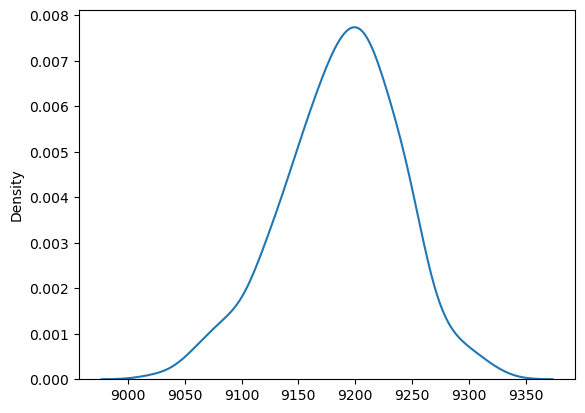

In [356]:
sns.kdeplot(married_sample)

<Axes: ylabel='Density'>

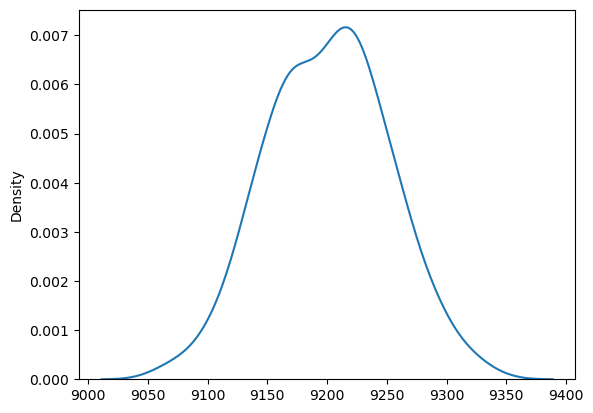

In [357]:
sns.kdeplot(unmarried_sample)

In [354]:
married_confidence_level_95 = np.percentile(married_sample,[2.5,97.5])
married_confidence_level_95

array([9080.231075, 9282.622325])

In [355]:
unmarried_confidence_level_95 = np.percentile(unmarried_sample,[2.5,97.5])
unmarried_confidence_level_95

array([9102.7942975, 9295.030165 ])

## we can conclude with 95% confidence that married poeple spend between 9080.23 and 9282.62

## we can conclude with 95% confidence that unmarried poeple spend between 9102.79 and 9295.03

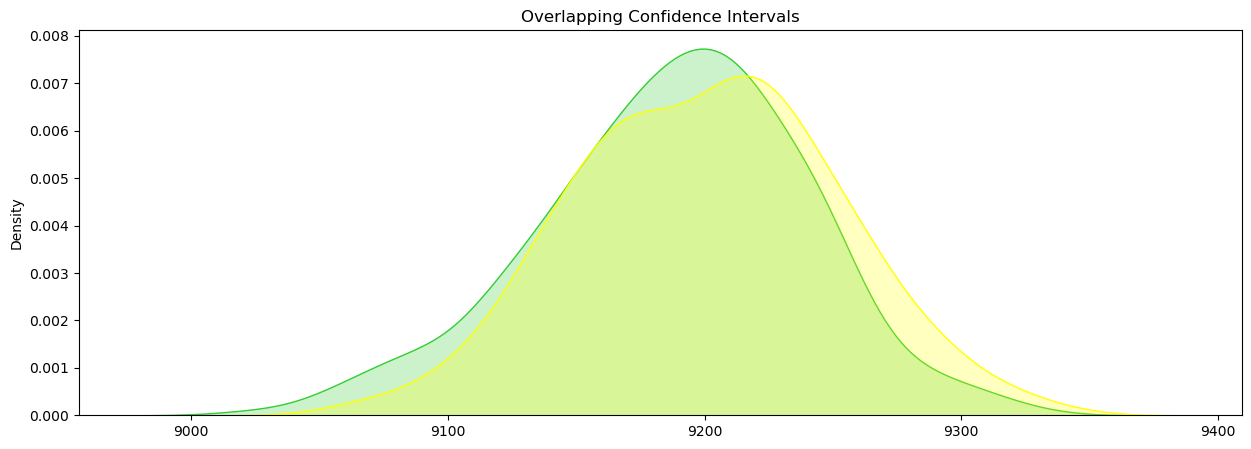

In [360]:
plt.figure(figsize=(15,5))
sns.kdeplot(married_sample,fill=True,color='limegreen')
sns.kdeplot(unmarried_sample,fill=True,color='yellow')
plt.title(f"Overlapping Confidence Intervals")
plt.show()

## Conclusion: The above graph clearly shows that there is no difference in purchases among married couple and unmarried people spending habits on black Friday.

# CLT FOR AGE

In [373]:
 df1['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [381]:
 df1['Age'].value_counts()

26-35    218661
36-45    109409
18-25     99334
46-50     45442
51-55     38191
55+       21322
0-17      15032
Name: Age, dtype: int64

In [376]:
age1_data = df1[df1['Age'] == '26-35']
age1_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
5,1000003,P00193542,M,26-35,15,A,3,0,1,15227
9,1000005,P00274942,M,26-35,20,A,1,1,8,7871
10,1000005,P00251242,M,26-35,20,A,1,1,5,5254
11,1000005,P00014542,M,26-35,20,A,1,1,8,3957
12,1000005,P00031342,M,26-35,20,A,1,1,8,6073


In [378]:
age2_data = df1[df1['Age'] == '55+']
age2_data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
159,1000031,P00117442,M,55+,7,C,2,0,5,8596
160,1000031,P00322042,M,55+,7,C,2,0,5,5248
161,1000031,P00216342,M,55+,7,C,2,0,3,10592
162,1000031,P00329342,M,55+,7,C,2,0,5,3482


In [379]:
age1_data['Purchase'].sum() - age2_data['Purchase'].sum()

1813735911

### customers who's age is 26-35 buy more as compared to customers who's age is 55+

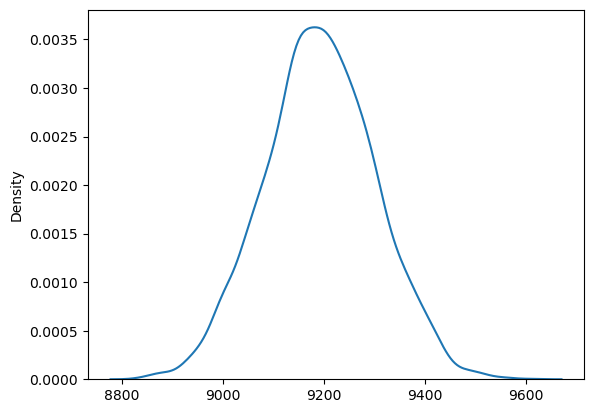

In [406]:
age1_sample_arr = []
for i in range(5000):
    x = age1_data['Purchase'].sample(2000).mean()         #iteration 10000 and sample size is 2000
    age1_sample_arr.append(x)
sns.kdeplot(age1_sample_arr)
plt.show()

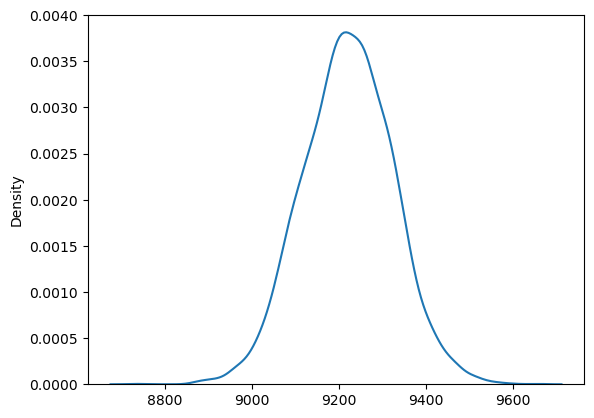

In [407]:
age2_sample_arr = []
for i in range(5000):
    x = age2_data['Purchase'].sample(2000).mean()
    age2_sample_arr.append(x)
sns.kdeplot(age2_sample_arr)
plt.show()

In [408]:
age1_confidence_level_95 = np.percentile(age1_sample_arr,[2.5,97.5])
age1_confidence_level_95

array([8982.1246   , 9408.2094125])

In [409]:
age2_confidence_level_95 = np.percentile(age2_sample_arr,[2.5,97.5])
age2_confidence_level_95

array([9018.8464875, 9423.5876875])

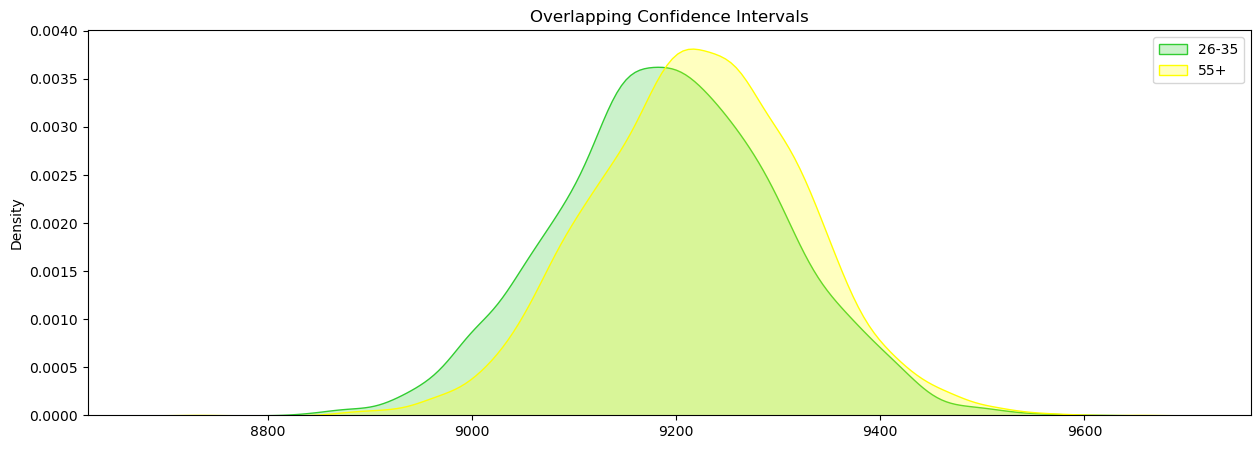

In [413]:
plt.figure(figsize=(15,5))
sns.kdeplot(age1_sample_arr,fill=True,color='limegreen',label="26-35")
sns.kdeplot(age2_sample_arr,fill=True,color='yellow',label = "55+")
plt.title(f"Overlapping Confidence Intervals")
plt.legend()
plt.show()

##  Conclusion: The above graph clearly shows that there is no difference in purchases among different age group of people's spending habits on black Friday.

# Recomendations:

## 1. Males purchases more than females on black friday so they should attract more men by advertisement, but they should also check via product ID that which type of products are purchased by men. Are men purchasing products for women then Walmart should re-think on it.
## 2. There is no significance difference between married or un marries couples spending  habits.
## 3. Age gap between customers also dosent matters a lot so it should focus on other aspects of demography as well.

In [414]:
print("Done")

Done
